In [21]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
% matplotlib inline

In [22]:
def rect_to_tuple(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
 
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [23]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
 
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
         coords[i] = (shape.part(i).x, shape.part(i).y)
 
    # return the list of (x, y)-coordinates
    return coords

In [24]:
predictor_path="/home/arooshi/Desktop/shape_predictor_68_face_landmarks.dat"
detector=dlib.get_frontal_face_detector()

In [25]:
predictor=dlib.shape_predictor(predictor_path)

In [26]:
im=cv2.imread("/home/arooshi/Desktop/download.jpeg")

In [27]:
im = imutils.resize(im, width=500)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)#image converted into grayscale

In [28]:
rects = detector(gray, 1)


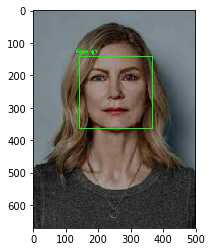

In [29]:
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = rect_to_tuple(rect)
	cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
	# show the face number
	cv2.putText(im, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(im, (x, y), 1, (0, 0, 255), -1)
 
  # show the output image with the face detections + facial landmarks
plt.imshow(imutils.opencv2matplotlib(im))
